In [126]:
import importlib, inspect
module = importlib.import_module('numpy')
source_lines = inspect.getsourcelines(getattr(module, 'save'))
print(len(source_lines))

def get_indent(line, replace_line_indent='    '):
    return_indent_num = 0
    split_lines = line.split(replace_line_indent)
    for split_line in split_lines:
        if len(split_line) > 0:
            break
        return_indent_num += 1
    return return_indent_num

def get_collon(line, colon=':'):
    return (1 if len(line) > 0 and line[-1] == colon else 0)

sources = source_lines[0]
commentout_flg = 0
def_line = 0
total_indent_num = None
replace_line_indent = '    '
colon = ':'
before_indent_num = 0
result_source_lines = []
before_parentheses = '('
after_parentheses = ')'

for idx in range(0, len(sources)):
    line = sources[idx].replace('\n', '')
    if line.find('@') > -1 or line.find('def') > -1:
        def_line = 1
    elif line.find('"""') > -1:
        if commentout_flg == 0:
            commentout_flg = 1
        elif commentout_flg == 1:
            commentout_flg = -1

    if def_line == 0 and commentout_flg == 0:
        if total_indent_num is None:
            total_indent_num = get_indent(line)

        indent_num = get_indent(line)
        output_line = line[len(replace_line_indent*total_indent_num):]
        colon_flg = get_collon(output_line)
        msg = ''
        indent_before_after_num = None
        if indent_num == before_indent_num:
            indent_before_after_num = 0
        elif indent_num > before_indent_num:
            indent_before_after_num = 1
        elif indent_num < before_indent_num:
            indent_before_after_num = -1
        split_before_line = output_line.split(before_parentheses)
        len_split_before_line = len(split_before_line) - 1
        split_after_line = output_line.split(after_parentheses)
        len_split_after_line = len(split_after_line) - 1
        result_source_lines.append([indent_num, colon_flg, indent_before_after_num, len_split_before_line, len_split_after_line, output_line])
        before_indent_num = indent_num
        
        
    def_line = 0
    if commentout_flg == -1:
        commentout_flg = 0

recreate_result_source_lines = []
z_fill_num = 2
start_num = None
source_idx = 0
pop_counter = 0
len_result_source_lines = len(result_source_lines)
for idx in range(0, len_result_source_lines):
    if idx + pop_counter + 1 >= len_result_source_lines:
        break
    [indent_num, colon_flg, indent_before_after_num, len_split_before_line, len_split_after_line, output_line] = result_source_lines[idx + pop_counter]
    if start_num is None:
        start_num = indent_num
    indent_num = indent_num - start_num
    if len_split_before_line == len_split_after_line:
        recreate_result_source_lines.append([indent_num, colon_flg, indent_before_after_num, output_line])
    else:
        recreate_result_source_lines.append([indent_num, colon_flg, indent_before_after_num, output_line])
        before_after_parentheses_sum = len_split_before_line
        for line_idx in range(idx + 1, len(result_source_lines)):
            [t_indent_num, t_colon_flg, t_indent_before_after_num, t_len_split_before_line, t_len_split_after_line, t_output_line] = result_source_lines[line_idx]
            recreate_result_source_lines[-1][-1] += t_output_line.replace(replace_line_indent, '')
            result_source_lines.pop(line_idx)
            pop_counter += 1
            before_after_parentheses_sum += t_len_split_before_line
            if before_after_parentheses_sum >= t_len_split_after_line:
                pop_counter -= 1
                break

2


In [122]:
import importlib
import graphviz

svg_extension='svg'
dot='.'
file_path='./'
file_name='activate'
# graph_type_str='Digraph'
graph_type='Digraph'
engine='dot'
file_extension='svg'
# graph_type = getattr(graphviz, graph_type_str)
# graph = graph_type(
#     name='root',
#     format=file_extension,
#     engine=engine
# )
graph_source_list = []

# graph_type = 'digraph'
space_str = ' '
before_brackets = '{'
after_brackets = '}'
subgraph_counter = 0
before_indent_num = None
zfill_str = 2
n_str = 'n'
before_node_name = None
node_edges = []

print(graph_type + space_str + 'g ' + before_brackets)
graph_source_list.append(graph_type + space_str + 'g ' + before_brackets)
subgraph_counter += 1

for idx in range(0, len(recreate_result_source_lines)):
    add_str = ''
    node_name = n_str + str(idx).zfill(zfill_str)
    [indent_num, colon_flg, indent_before_after_num, line] = recreate_result_source_lines[idx]
    line = line.replace('    ', '').replace('"', '\'')
    if len(line) == 0:
        continue
    if before_indent_num is None or before_indent_num == indent_num:
        print('\t'*subgraph_counter + node_name + ' [label="' + line + '"]')
        graph_source_list.append('\t'*subgraph_counter + node_name + ' [label="' + line + '"]')
        
    elif before_indent_num < indent_num:
        change_indent_num = indent_num - before_indent_num
        add_str = 'subgraph' + space_str + node_name + space_str + before_brackets
        for change_indent_num_idx in range(0, change_indent_num):
            print('\t'*subgraph_counter + add_str)
            graph_source_list.append('\t'*subgraph_counter + add_str)
            subgraph_counter += 1
        print('\t'*subgraph_counter + node_name + space_str + '[label="' + line + '"]')
        graph_source_list.append('\t'*subgraph_counter + node_name + space_str + '[label="' + line + '"]')
    elif before_indent_num > indent_num:
        change_indent_num = before_indent_num - indent_num
        add_str = after_brackets
        for change_indent_num_idx in range(0, change_indent_num):
            subgraph_counter -= 1
            print('\t'*subgraph_counter + add_str)
            graph_source_list.append('\t'*subgraph_counter + add_str)
        print('\t'*subgraph_counter + node_name + space_str + '[label="' + line + '"]')
        graph_source_list.append('\t'*subgraph_counter + node_name + space_str + '[label="' + line + '"]')
    
    if before_node_name is not None:
        # node_edges.append((before_node_name, node_name))
        print('\t'*subgraph_counter + before_node_name + space_str + '->' + space_str + node_name)
        graph_source_list.append('\t'*subgraph_counter + before_node_name + space_str + '->' + space_str + node_name)
    before_indent_num = indent_num
    before_node_name = node_name

if subgraph_counter > 0:
    add_str = after_brackets
    for subgraph_counter_idx in range(0, subgraph_counter):
        subgraph_counter -= 1
        print('\t'*subgraph_counter + add_str)
        graph_source_list.append('\t'*subgraph_counter + add_str)
# print(after_brackets)
# graph_source_list.append(after_brackets)
print(subgraph_counter)

Digraph g {
	n00 [label="own_fid = False"]
	n01 [label="if hasattr(file, 'read'):"]
	n00 -> n01
	subgraph n02 {
		n02 [label="fid = file"]
		n01 -> n02
	}
	n03 [label="else:"]
	n02 -> n03
	subgraph n04 {
		n04 [label="file = os_fspath(file)"]
		n03 -> n04
		n05 [label="if not file.endswith('.npy'):"]
		n04 -> n05
		subgraph n06 {
			n06 [label="file = file + '.npy'"]
			n05 -> n06
		}
		n07 [label="fid = open(file, 'wb')"]
		n06 -> n07
		n08 [label="own_fid = True"]
		n07 -> n08
	}
	n10 [label="if sys.version_info[0] >= 3:"]
	n08 -> n10
	subgraph n11 {
		n11 [label="pickle_kwargs = dict(fix_imports=fix_imports)"]
		n10 -> n11
	}
	n12 [label="else:"]
	n11 -> n12
	subgraph n13 {
		n13 [label="# Nothing to do on Python 2"]
		n12 -> n13
		n14 [label="pickle_kwargs = None"]
		n13 -> n14
	}
	n16 [label="try:"]
	n14 -> n16
	subgraph n17 {
		n17 [label="arr = np.asanyarray(arr)"]
		n16 -> n17
		n18 [label="format.write_array(fid, arr, allow_pickle=allow_pickle,   pickle_kwargs=pickle_kwargs)"]

In [123]:
# for idx in range(0, len(graph_source_list)):
#     print(idx, '\t', graph_source_list[idx])
print('\n'.join(graph_source_list))
# with open('./holy-grenade', mode='w') as wf:
#     wf.write('\n'.join(graph_source_list))
src = graphviz.Source('\n'.join(graph_source_list))

Digraph g {
	n00 [label="own_fid = False"]
	n01 [label="if hasattr(file, 'read'):"]
	n00 -> n01
	subgraph n02 {
		n02 [label="fid = file"]
		n01 -> n02
	}
	n03 [label="else:"]
	n02 -> n03
	subgraph n04 {
		n04 [label="file = os_fspath(file)"]
		n03 -> n04
		n05 [label="if not file.endswith('.npy'):"]
		n04 -> n05
		subgraph n06 {
			n06 [label="file = file + '.npy'"]
			n05 -> n06
		}
		n07 [label="fid = open(file, 'wb')"]
		n06 -> n07
		n08 [label="own_fid = True"]
		n07 -> n08
	}
	n10 [label="if sys.version_info[0] >= 3:"]
	n08 -> n10
	subgraph n11 {
		n11 [label="pickle_kwargs = dict(fix_imports=fix_imports)"]
		n10 -> n11
	}
	n12 [label="else:"]
	n11 -> n12
	subgraph n13 {
		n13 [label="# Nothing to do on Python 2"]
		n12 -> n13
		n14 [label="pickle_kwargs = None"]
		n13 -> n14
	}
	n16 [label="try:"]
	n14 -> n16
	subgraph n17 {
		n17 [label="arr = np.asanyarray(arr)"]
		n16 -> n17
		n18 [label="format.write_array(fid, arr, allow_pickle=allow_pickle,   pickle_kwargs=pickle_kwargs)"]

In [124]:
# # dir(src)
# print(node_edges[0])
# # edge = node_edges[0]
# # src.edge(edge[0], edge[1])
# src.edges(node_edges)

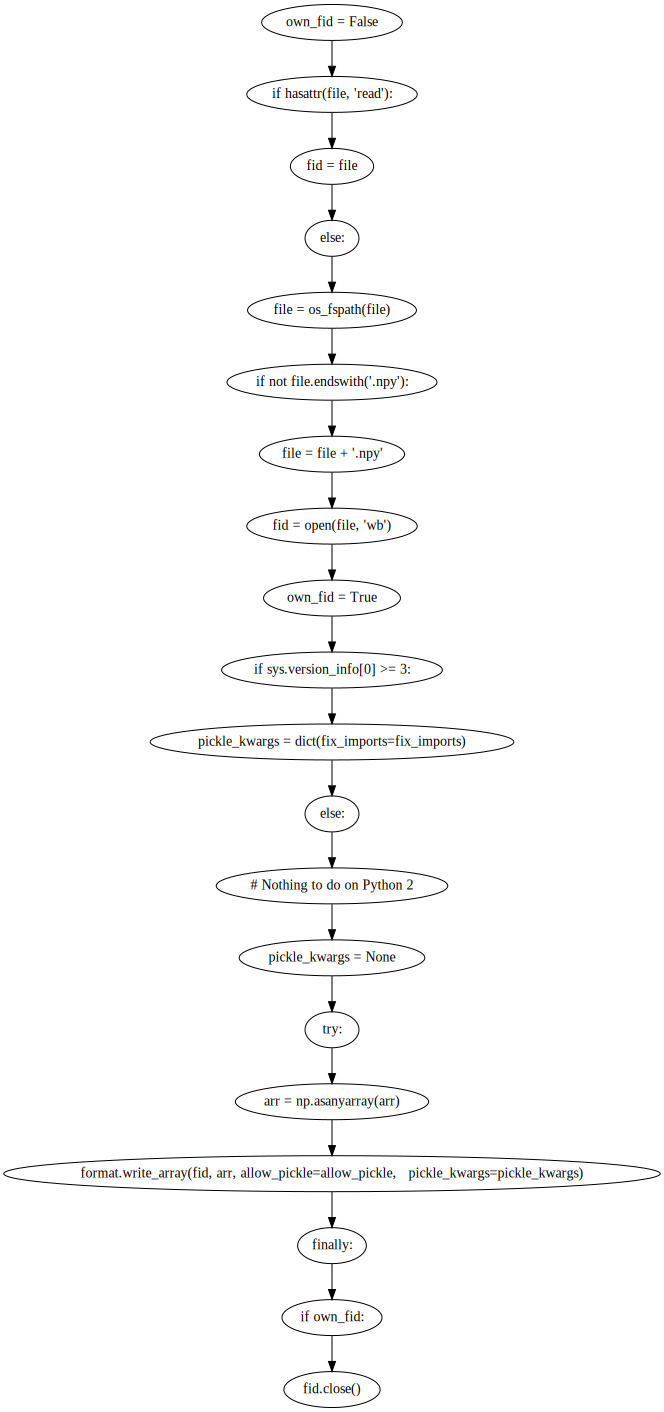

In [125]:
src

In [14]:
src.render('holy-grenade.gv', view=False)

'holy-grenade.gv.pdf'

In [107]:

from graphviz import Digraph

g = Digraph('G', filename='cluster.gv')

# NOTE: the subgraph name needs to begin with 'cluster' (all lowercase)
#       so that Graphviz recognizes it as a special cluster subgraph

with g.subgraph(name='cluster_0') as c:
    c.attr(style='filled', color='lightgrey')
    c.node_attr.update(style='filled', color='white')
    c.edges([('a0', 'a1'), ('a1', 'a2'), ('a2', 'a3')])
    c.attr(label='process #1')

with g.subgraph(name='cluster_1') as c:
    c.attr(color='blue')
    c.node_attr['style'] = 'filled'
    c.edges([('b0', 'b1'), ('b1', 'b2'), ('b2', 'b3')])
    c.attr(label='process #2')

g.edge('start', 'a0')
g.edge('start', 'b0')
g.edge('a1', 'b3')
g.edge('b2', 'a3')
g.edge('a3', 'a0')
g.edge('a3', 'end')
g.edge('b3', 'end')

g.node('start', shape='Mdiamond')
g.node('end', shape='Msquare')

# g.view()
print(g.source)

digraph G {
	subgraph cluster_0 {
		node [color=white style=filled]
		color=lightgrey style=filled
		a0 -> a1
		a1 -> a2
		a2 -> a3
		label="process #1"
	}
	subgraph cluster_1 {
		node [style=filled]
		color=blue
		b0 -> b1
		b1 -> b2
		b2 -> b3
		label="process #2"
	}
	start -> a0
	start -> b0
	a1 -> b3
	b2 -> a3
	a3 -> a0
	a3 -> end
	b3 -> end
	start [shape=Mdiamond]
	end [shape=Msquare]
}


In [44]:
# import tokenize

# with tokenize.open('hello.py') as f:
#     tokens = tokenize.generate_tokens(f.readline)
#     for token in tokens:
#         print('*'*25)
#         print(token, type(token))
#         # for key in token:
#         #     print('\t', key)
#         # for key in dir(token):
#         #     print('\t\t', key)
#         # token_count = token.count
#         # print('\ttoken_count', token_count, token_count.__class__.__module__)
#         token_end = token.end
#         print('\ttoken_end', token_end)
#         token_exact_type = token.exact_type
#         print('\ttoken_exact_type', token_exact_type)
#         # token_index = token.index
#         # print('\ttoken_index', token_index)
#         token_line = token.line
#         print('\ttoken_line', token_line)
#         token_start = token.start
#         print('\ttoken_start', token_start)
#         token_string = token.string
#         print('\ttoken_string', token_string)
#         token_type = token.type
#         print('\ttoken_type', token_type)

In [80]:
import tokenize

with tokenize.open('hello.py') as f:
    tokens = tokenize.generate_tokens(f.readline)
    before_line = None
    for token in tokens:
        # print('*'*25)
        # print(token, type(token))
        token_end = token.end
        token_exact_type = token.exact_type
        token_line = token.line
        token_start = token.start
        token_string = token.string
        token_type = token.type
        if before_line is None or before_line != token_line:
            print('*'*25)
            print(token_line)
        print('\t', token_start[0], token_start[1], token_end[0], token_end[1], token_string, token_type, token_exact_type)
        before_line = token_line


*************************
def say_hello():

	 1 0 1 3 def 1 1
	 1 4 1 13 say_hello 1 1
	 1 13 1 14 ( 53 7
	 1 14 1 15 ) 53 8
	 1 15 1 16 : 53 11
	 1 16 1 17 
 4 4
*************************
    print("Hello, World!")

	 2 0 2 4      5 5
	 2 4 2 9 print 1 1
	 2 9 2 10 ( 53 7
	 2 10 2 25 "Hello, World!" 3 3
	 2 25 2 26 ) 53 8
	 2 26 2 27 
 4 4
*************************


	 3 0 3 1 
 58 58
*************************
say_hello()
	 4 0 4 0  6 6
	 4 0 4 9 say_hello 1 1
	 4 9 4 10 ( 53 7
	 4 10 4 11 ) 53 8
*************************

	 4 11 4 12  4 4
	 5 0 5 0  0 0


In [84]:
# import tokenize

# # with tokenize.open('hello.py') as f:
# # tokens = tokenize.generate_tokens('\n'.join(sources))
# # tokens = tokenize.tokenize('\n'.join(sources))
# # tokens = tokenize.untokenize('\n'.join(sources))
# # tokens = tokenize.detect_encoding('\n'.join(sources))
# from io import BytesIO
# tokens = tokenize.tokenize(BytesIO('\n'.join(sources).encode('utf-8')).readline)
# before_line = None
# for token in tokens:
#     # print('*'*25)
#     # print(token, type(token))
#     token_end = token.end
#     token_exact_type = token.exact_type
#     token_line = token.line
#     token_start = token.start
#     token_string = token.string
#     token_type = token.type
#     if before_line is None or before_line != token_line:
#         print('*'*75)
#         print('token_line\t', token_line)
#     # print('\t', token_start[0], token_start[1], token_end[0], token_end[1], token_string, token_type, token_exact_type)
#     print('\t', token_start, token_end, token_string, token_type, token_exact_type)
#     before_line = token_line


In [85]:
# dir(tokenize)

In [86]:
# sources

In [3]:
import importlib
import graphviz

svg_extension='svg'
dot='.'
file_path='./'
file_name='activate'
graph_type='Digraph'
engine='dot'
file_extension='svg'
graph_type = getattr(graphviz, graph_type)
graph = graph_type(
    name='root',
    format=file_extension,
    engine=engine
)

In [84]:
class graph_creator(object):
    
    def __init__(self,
                 target_json,
                 svg_extension='svg',
                 dot='.',
                 file_path='./',
                 file_name='activate',
                 graph_type='Digraph',
                 engine='dot',
                 file_extension='svg'):
        import importlib
        import graphviz
        self.target_json = target_json
        self.graphviz = graphviz
        self.graph_type = getattr(graphviz, graph_type)
        self.file_extension = file_extension
        self.file_path = file_path
        self.file_name = file_name
        self.dot = dot
        self.engine = engine
        self.graph = self.graph_type(
            name='root',
            format=self.file_extension,
            engine=self.engine)
        self._create_graph()
        
    def _check_dictionary(self, dictionary, target_str):
        if dictionary.get(target_str) is None:
            return None
        else:
            return dictionary[target_str]
    def _check_attrs(self, attrs):
        attr_id = self._check_dictionary(attrs, 'id')
        attr_shape = self._check_dictionary(attrs, 'shape')
        attr_shape = attr_shape if attr_shape is not None else 'rect'
        attr_label = self._check_dictionary(attrs, 'label')
        attr_style = self._check_dictionary(attrs, 'style')
        attr_color = self._check_dictionary(attrs, 'color')
        return [attr_id, attr_shape, attr_label, attr_style, attr_color]
    
    def _create_subgraph(self, parent_graph, subgraphs):
        for idx in range(0, len(subgraphs)):
            subgraph = subgraphs[idx]
            child_subgraph = None
            if subgraph.get('subgraph') is not None:
                child_subgraph = subgraph['subgraph']

            name = subgraph['name']
            attrs = subgraph['attr']
            node_attr = subgraph['node_attr']
            nodes = subgraph['nodes']
            edges = subgraph['edges']
            print(name)
            print(attrs)
            print(node_attr)
            print(nodes)
            print(edges)

            [attr_id, attr_shape, attr_label, attr_style, attr_color] = self._check_attrs(attrs)

            [node_attr_id, node_attr_shape, node_attr_label, node_attr_style, node_attr_color] = self._check_attrs(node_attr)

            with parent_graph.subgraph(name=name) as sub:
                if child_subgraph is not None:
                    self._create_subgraph(sub, child_subgraph)
                for node_idx in range(0, len(nodes)):
                    # sub.node()
                    node = nodes[node_idx]
                    child_node_attr = node['attr']
                    [child_node_attr_id, child_node_attr_shape, child_node_attr_label, child_node_attr_style, child_node_attr_color] = self._check_attrs(child_node_attr)
                    sub.node(child_node_attr_id, id=child_node_attr_id, shape=child_node_attr_shape, label=child_node_attr_label, style=child_node_attr_style, color=child_node_attr_color)
                sub.node_attr.update(id=node_attr_id, shape=node_attr_shape, label=node_attr_label, style=node_attr_style, color=node_attr_color)
                sub.attr(id=attr_id, shape=attr_shape, label=attr_label, style=attr_style, color=attr_color)
                self._create_nodes(sub, nodes)
                self._create_edges(sub, edges)

    def _create_nodes(self, parent_graph, target_nodes):
        for idx in range(0, len(target_nodes)):
            target_node = target_nodes[idx]
            attrs = target_node['attr']
            [attr_id, attr_shape, attr_label, attr_style, attr_color] = self._check_attrs(attrs)
            attr_name = attr_id if attr_id is not None else ''
            parent_graph.node(attr_name, id=attr_id, shape=attr_shape, label=attr_label, style=attr_style, color=attr_color)

    def _create_edges(self, parent_graph, target_edges):
        for idx in range(0, len(target_edges)):
            target_attr = target_edges[idx]
            edge = target_attr['edge']
            attrs = target_attr['attr']
            print(attrs)
            [attr_id, attr_shape, attr_label, attr_style, attr_color] = self._check_attrs(attrs)
            attr_name = attr_id if attr_id is not None else ''
            parent_graph.edge(edge[0], edge[1], id=attr_id, shape=attr_shape, label=attr_label, style=attr_style, color=attr_color)
            
    def _create_graph(self):
        self._create_subgraph(self.graph, self.target_json['subgraph'])
        # self._create_nodes(self.graph, self.target_json['nodes'])
        # self._create_edges(self.graph, self.target_json['edges'])

    def output_graph(self):
        output_file_path = self.file_path + self.file_name
        self.graph.render(output_file_path, view=False)


In [87]:
output_graph_dict = {
    'subgraph': [
        {
            'name': 'root',
            'attr': {},
            'node_attr': {},
            'nodes': [
                {
                    'attr': {
                        'id': 'start',
                        'shape': 'Mdiamond'
                    }
                },
                {
                    'attr': {
                        'id': 'end',
                        'shape': 'Mdiamond'
                    }
                },
            ],
            'edges': [
                {
                    'edge': ('start', 'a1'),
                    'attr': {'id': 'start-a1'}
                }, {
                    'edge': ('b3', 'end'),
                    'attr': {'id': 'b3-end'}
                }, {
                    'edge': ('a3', 'end'),
                    'attr': {'id': 'a3-end'}
                }, {
                    'edge': ('a1', 'b3'),
                    'attr': {'id': 'a1-b3'}
                }, {
                    'edge': ('b2', 'a3'),
                    'attr': {'id': 'b2-a3'}
                }, {
                    'edge': ('start', 'b0'),
                    'attr': {'id': 'start-b0'}
                },
            ],
            'subgraph': [
                {
                    'name': 'cluster_0',
                    'attr': {
                        'style': 'filled',
                        'color': 'lightgrey',
                        'label': 'process #1'
                    },
                    'node_attr': {
                        'style': 'filled',
                        'color': 'white'
                    },
                    'nodes': [
                        {'attr': {'id': 'a0'}},
                        {'attr': {'id': 'a1'}},
                        {'attr': {'id': 'a2'}},
                        {'attr': {'id': 'a3'}},
                    ],
                    'edges': [
                        {
                            'edge': ('a0', 'a1'),
                            'attr': {'id': 'a0-a1'}
                        }, {
                            'edge': ('a1', 'a2'),
                            'attr': {'id': 'a1-a2'}
                        }, {
                            'edge': ('a2', 'a3'),
                            'attr': {'id': 'a2-a3'}
                        }, {
                            'edge': ('a3', 'a0'),
                            'attr': {'id': 'a3-a0'}
                        },
                    ],
                    'subgraph': [
                        {
                            'name': 'cluster_2',
                            'attr': {
                                'style': 'filled',
                                'label': 'process #3'
                            },
                            'node_attr': {
                                'style': 'filled',
                                'color': 'yellow'
                            },
                            'nodes': [
                                {'attr': {'id': 'c0'}},
                                {'attr': {'id': 'c1'}},
                                {'attr': {'id': 'c2'}},
                                {'attr': {'id': 'c3'}},
                            ],
                            'edges': [],
                        },
                    ]
                },
                {
                    'name': 'cluster_1',
                    'attr': {
                        'color': 'blue',
                        'label': 'process #2'
                    },
                    'node_attr': {
                        'style': 'filled'
                    },
                    'nodes': [
                        {'attr': {'id': 'b0'}},
                        {'attr': {'id': 'b1'}},
                        {'attr': {'id': 'b2'}},
                        {'attr': {'id': 'b3'}}
                    ],
                    'edges': [
                        {
                            'edge': ('b0', 'b1'),
                            'attr': {'id': 'b0-b1'}
                        }, {
                            'edge': ('b1', 'b2'),
                            'attr': {'id': 'b1-b2'}
                        }, {
                            'edge': ('b2', 'b3'),
                            'attr': {'id': 'b2-b3'}
                        }
                    ]
                }
            ],
        },
    ]
}

In [88]:
from graphviz import Digraph

file_path = './../data/create/'
file_name = 'activate-graph-20200229-8'

gc = graph_creator(output_graph_dict, file_path=file_path, file_name=file_name)
gc.output_graph()

root
{}
{}
[{'attr': {'id': 'start', 'shape': 'Mdiamond'}}, {'attr': {'id': 'end', 'shape': 'Mdiamond'}}]
[{'edge': ('start', 'a1'), 'attr': {'id': 'start-a1'}}, {'edge': ('b3', 'end'), 'attr': {'id': 'b3-end'}}, {'edge': ('a3', 'end'), 'attr': {'id': 'a3-end'}}, {'edge': ('a1', 'b3'), 'attr': {'id': 'a1-b3'}}, {'edge': ('b2', 'a3'), 'attr': {'id': 'b2-a3'}}, {'edge': ('start', 'b0'), 'attr': {'id': 'start-b0'}}]
cluster_0
{'style': 'filled', 'color': 'lightgrey', 'label': 'process #1'}
{'style': 'filled', 'color': 'white'}
[{'attr': {'id': 'a0'}}, {'attr': {'id': 'a1'}}, {'attr': {'id': 'a2'}}, {'attr': {'id': 'a3'}}]
[{'edge': ('a0', 'a1'), 'attr': {'id': 'a0-a1'}}, {'edge': ('a1', 'a2'), 'attr': {'id': 'a1-a2'}}, {'edge': ('a2', 'a3'), 'attr': {'id': 'a2-a3'}}, {'edge': ('a3', 'a0'), 'attr': {'id': 'a3-a0'}}]
cluster_2
{'style': 'filled', 'label': 'process #3'}
{'style': 'filled', 'color': 'yellow'}
[{'attr': {'id': 'c0'}}, {'attr': {'id': 'c1'}}, {'attr': {'id': 'c2'}}, {'attr': {'

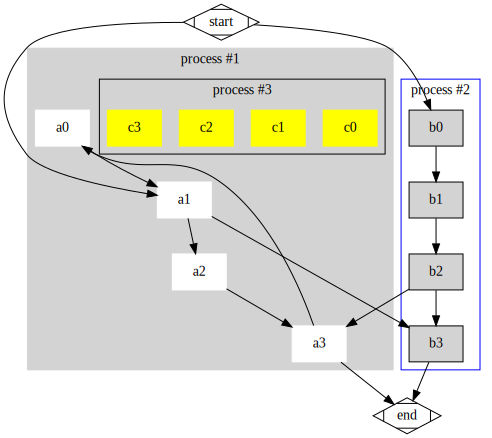

In [89]:
gc.graph